<a href="https://colab.research.google.com/github/Voztok94/Hyperparamter-Turning/blob/main/Hyperparamter_Turning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
iris = load_iris()  #  Load the Iris dataset
X = iris.data
y = iris.target

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# 1. Determine the optimal k value using cross-validation
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    k_scores.append(scores.mean())

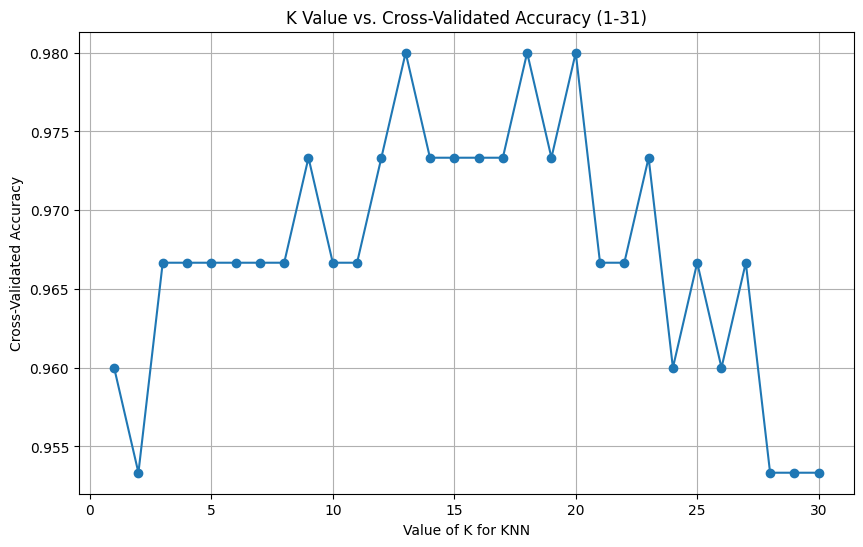

In [ ]:
# 2. Plot the 'Value of K for KNN' vs. 'Cross-Validated Accuracy' for k = 1-31
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Value vs. Cross-Validated Accuracy (1-31)')
plt.grid(True)
plt.show()

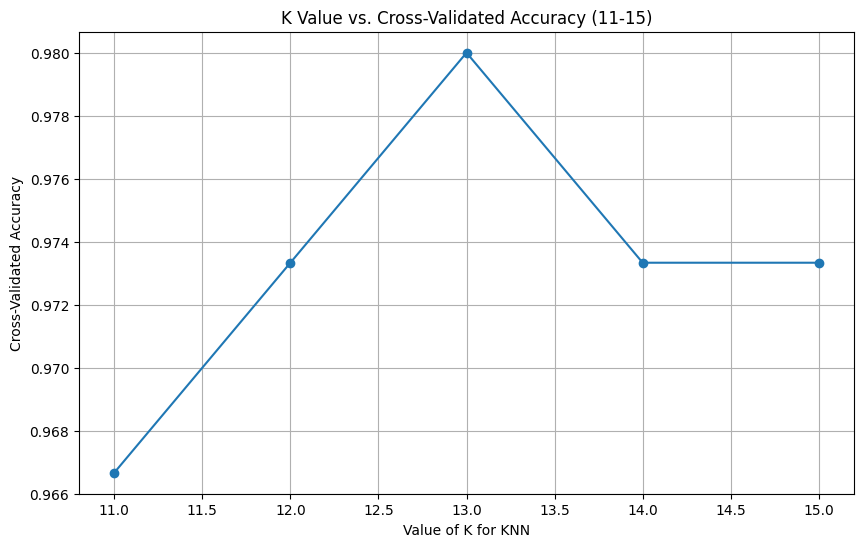

In [ ]:
# 3. Plot the zoomed-in version for k = 11-15
plt.figure(figsize=(10, 6))
plt.plot(k_range[10:15], k_scores[10:15], marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Value vs. Cross-Validated Accuracy (11-15)')
plt.grid(True)
plt.show()

In [ ]:
# 4. Use GridSearchCV to confirm k=13 as the optimal parameter
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid, cv=10)
knn_gscv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [ ]:
# Display the optimal k value found
optimal_k = knn_gscv.best_params_['n_neighbors']
print(f"Optimal k value found using GridSearchCV: {optimal_k}")

Optimal k value found using GridSearchCV: 13
